In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
sns.set(style="darkgrid") 
from scipy.stats import skew

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/insurance.csv")
df=df.copy()

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
df.shape

(1338, 7)

In [8]:
df.isnull().sum().values.sum()

0

In [10]:
df.sex=df['sex'].astype("category")
df.smoker=df['smoker'].astype("category")
df.region=df['region'].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [12]:
df.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
list_col=  df.select_dtypes(['category']).columns
list_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [15]:
list_col=  df.select_dtypes(['category']).columns
for i in range(len(list_col)):
     print(df[list_col[i]].value_counts())
   

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [17]:
def dist_box(data):

     Name=data.name.upper()
     fig,(ax_box,ax_dis)  = plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
     print(fig,(ax_box,ax_dis))
     mean=data.mean()
     median=data.median()
     mode=data.mode().tolist()[0]

     fig.suptitle(f"SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
     sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
     ax_box.set(xlabel='')
     sns.distplot(data,kde=False,color='blue',ax=ax_dis)

     ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
     ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
     ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
     plt.legend({'Mean':mean,'Median':median,'Mode':mode})

Figure(800x500) (<Axes: >, <Axes: >)
0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64
Figure(800x500) (<Axes: >, <Axes: >)
0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1333    31.0
1334    31.9
1335    36.9
1336    25.8
1337    29.1
Name: bmi, Length: 1338, dtype: float64
Figure(800x500) (<Axes: >, <Axes: >)
0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64
Figure(800x500) (<Axes: >, <Axes: >)
0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


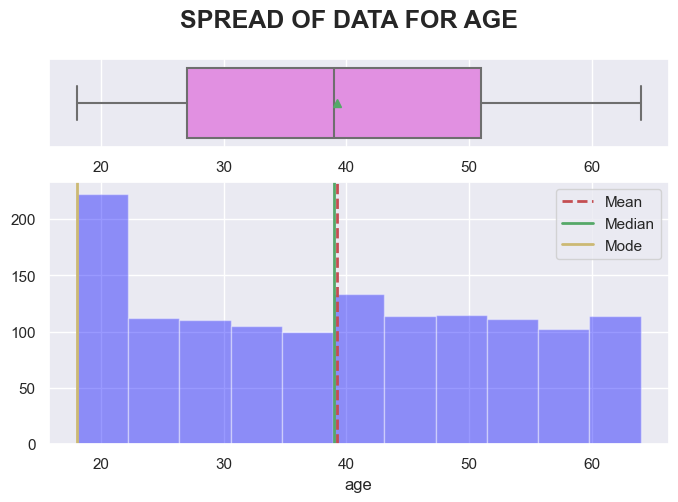

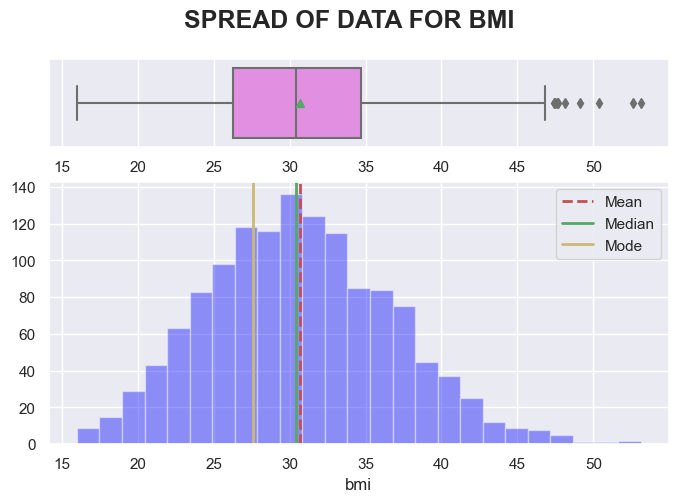

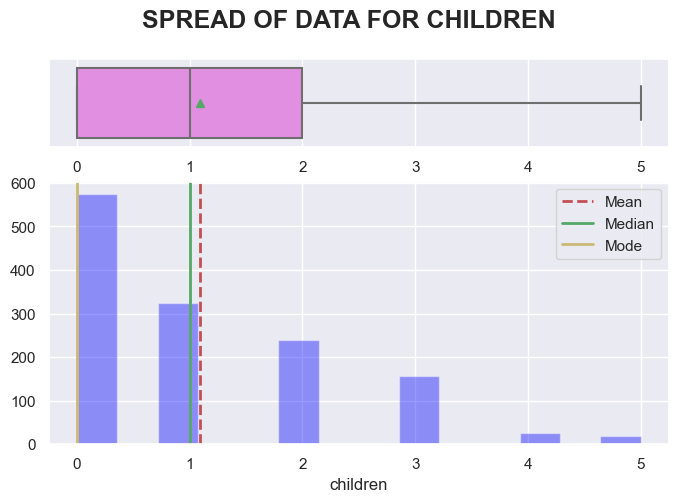

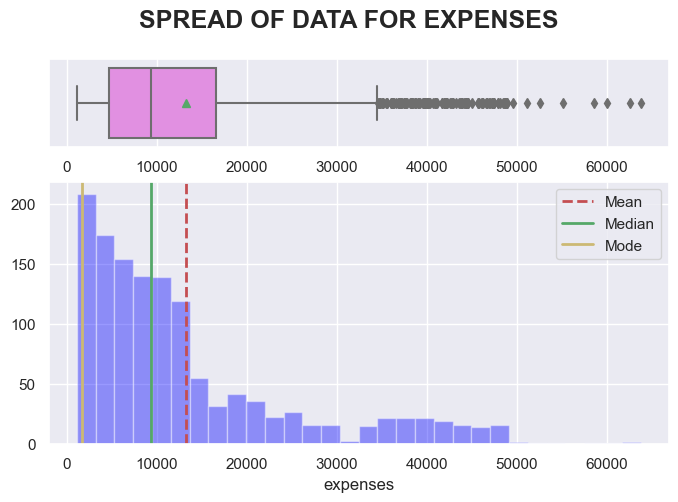

In [18]:
 list_col=  df.select_dtypes([np.number]).columns
 for i in range(len(list_col)):
     dist_box(df[list_col[i]])

     print(df[list_col[i]])

In [19]:
def bar_perc(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()      
        plot.annotate(percentage, (x, y), size = 12)

Index(['sex', 'smoker', 'region'], dtype='object')
CategoricalIndex(['male', 'female'], categories=['female', 'male'], ordered=False, dtype='category')
CategoricalIndex(['no', 'yes'], categories=['no', 'yes'], ordered=False, dtype='category')
CategoricalIndex(['southeast', 'northwest', 'southwest', 'northeast'], categories=['northeast', 'northwest', 'southeast', 'southwest'], ordered=False, dtype='category')


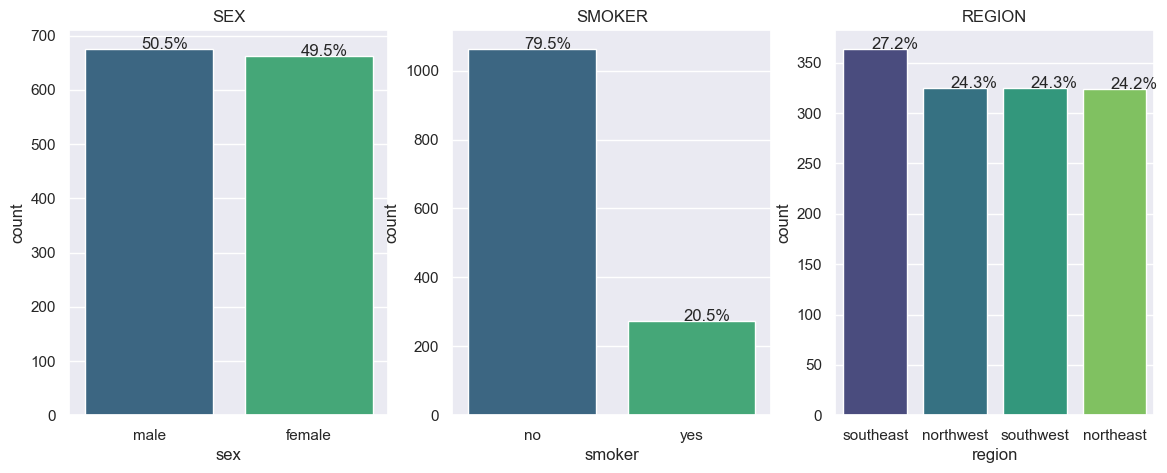

In [23]:
list_col=  df.select_dtypes(['category']).columns
print(list_col)
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range(len(list_col)):
    order = df[list_col[i]].value_counts(ascending=False).index 

    axis=sns.countplot(x=list_col[i], data=df , order=order,ax=axes1[i],palette='viridis').set(title=list_col[i].upper())
    bar_perc(axes1[i],df[list_col[i]])
    print(order)

In [26]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


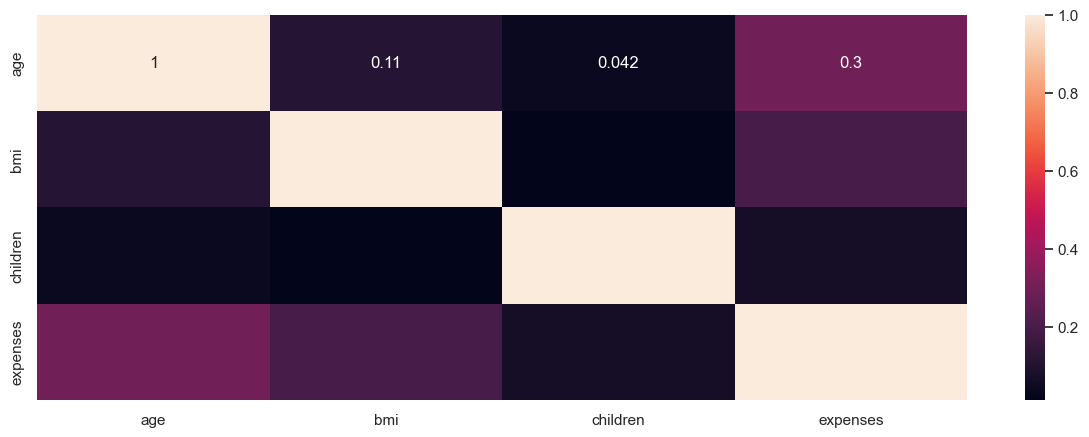

In [27]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 500x500 with 0 Axes>

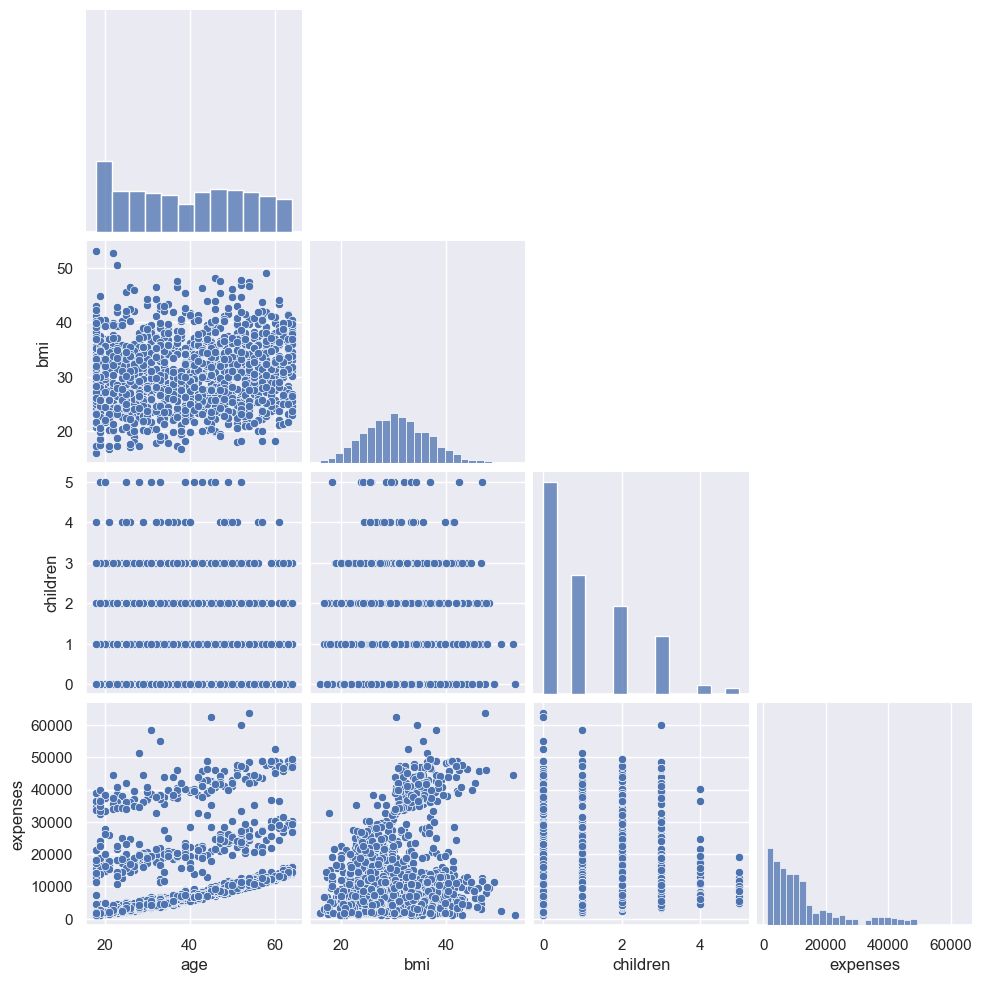

In [28]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df , corner=True)
plt.show()

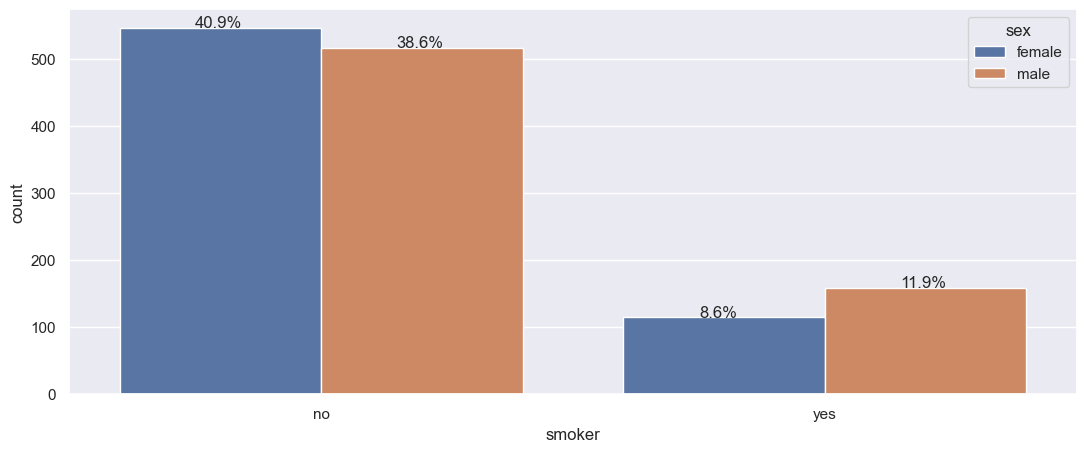

In [29]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=df)
bar_perc(ax,df['sex'])

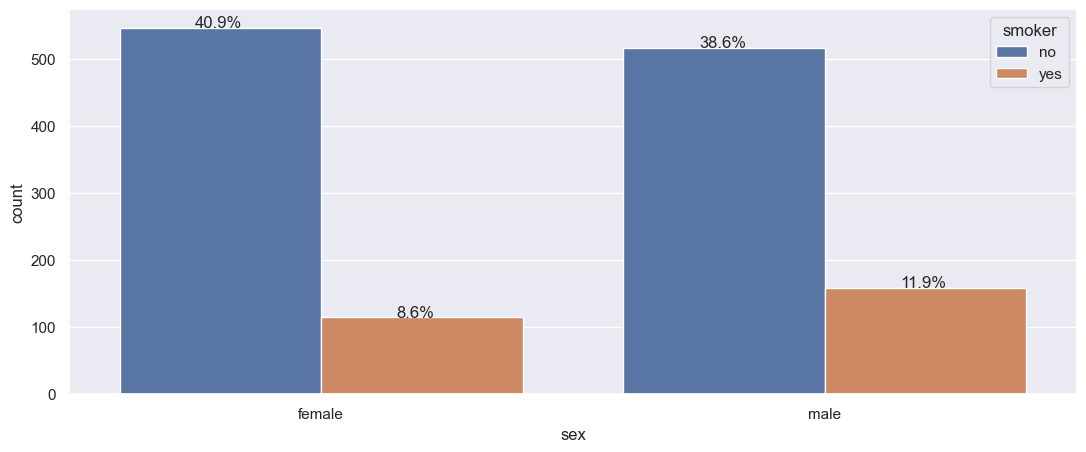

In [32]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='sex',hue='smoker',data=df)
bar_perc(ax,df['smoker'])

[Text(0.5, 1.0, 'Smoker vs Charges')]

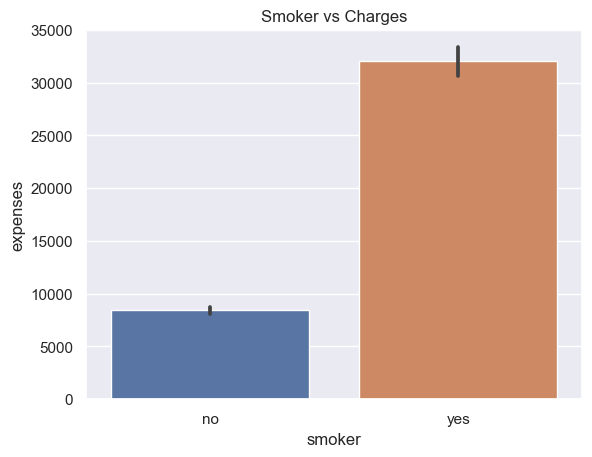

In [33]:
sns.barplot(x=df.smoker,y=df.expenses).set(title="Smoker vs Charges")

[Text(0.5, 1.0, 'Smoker vs Region')]

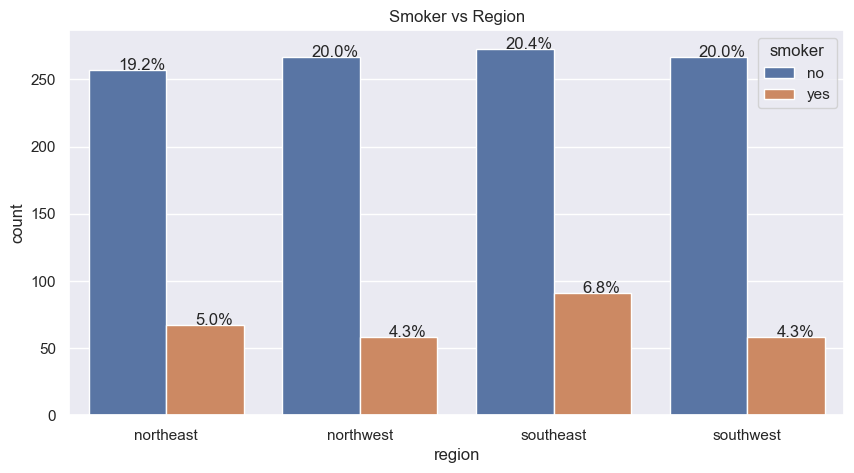

In [34]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='region',hue='smoker',data=df)
bar_perc(ax,df['smoker'])
ax.set(title="Smoker vs Region")

[Text(0.5, 1.0, 'Smoker vs Region')]

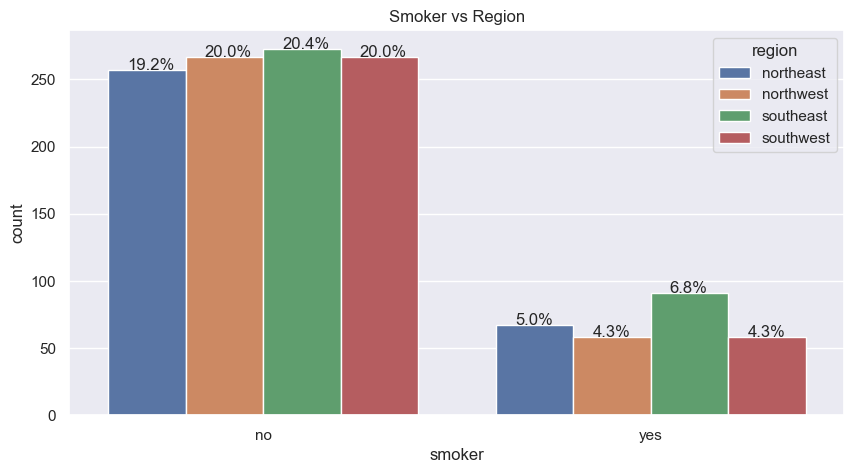

In [35]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='smoker',hue='region',data=df)
bar_perc(ax,df['region'])
ax.set(title="Smoker vs Region")

[Text(0.5, 1.0, 'Sex vs Region')]

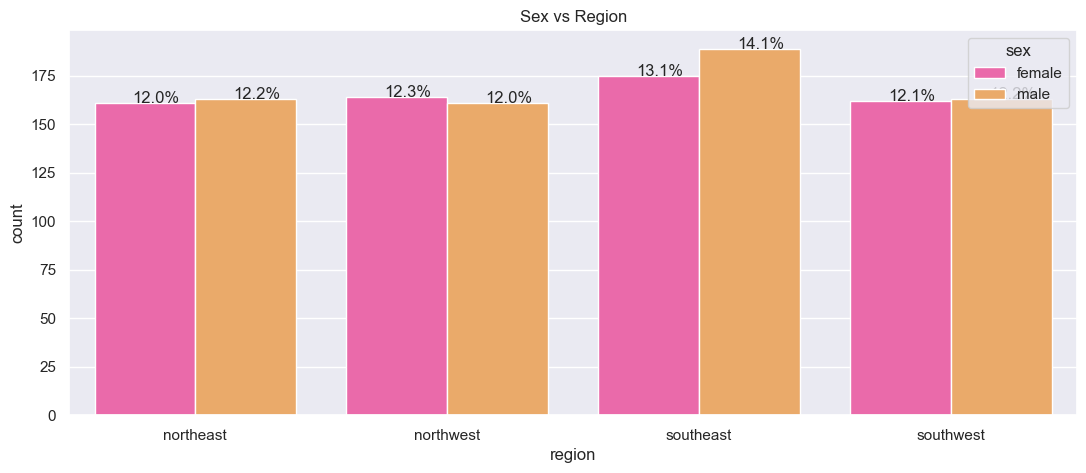

In [36]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=df,palette='spring')
bar_perc(ax,df['sex'])
ax.set(title="Sex vs Region")

In [37]:
df.groupby(df.sex).expenses.mean() 

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

In [38]:
df.groupby(df.region).expenses.mean() 

region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64

In [39]:
df.groupby(df.smoker).expenses.mean() 

smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64

In [40]:
df.groupby(df.children).expenses.mean() 

children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64

In [41]:
df.groupby(df.sex).expenses.mean() 

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

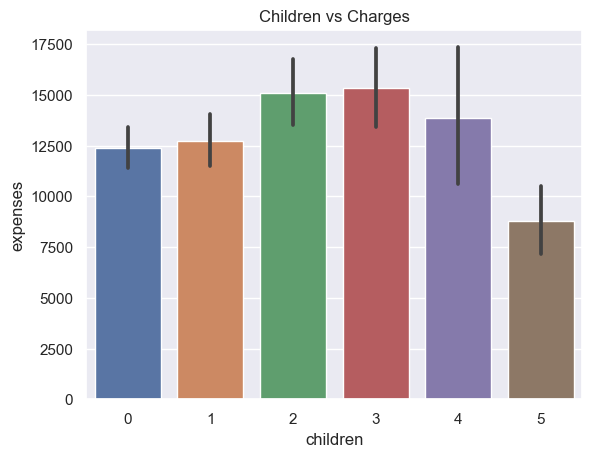

In [42]:
ax = sns.barplot(x=df.children,y=df.expenses).set(title="Children vs Charges")

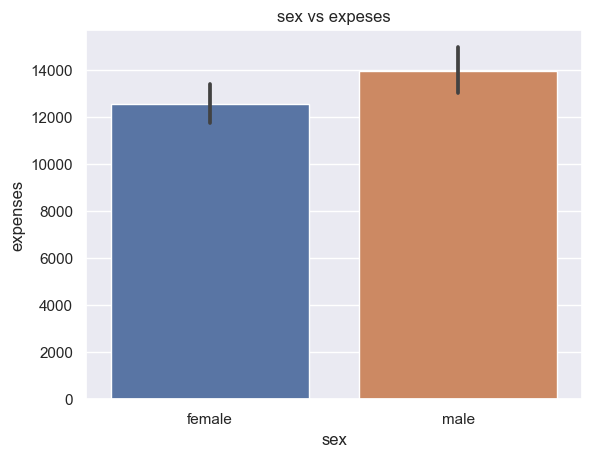

In [44]:
ax = sns.barplot(x=df.sex,y=df.expenses).set(title="sex vs expeses")

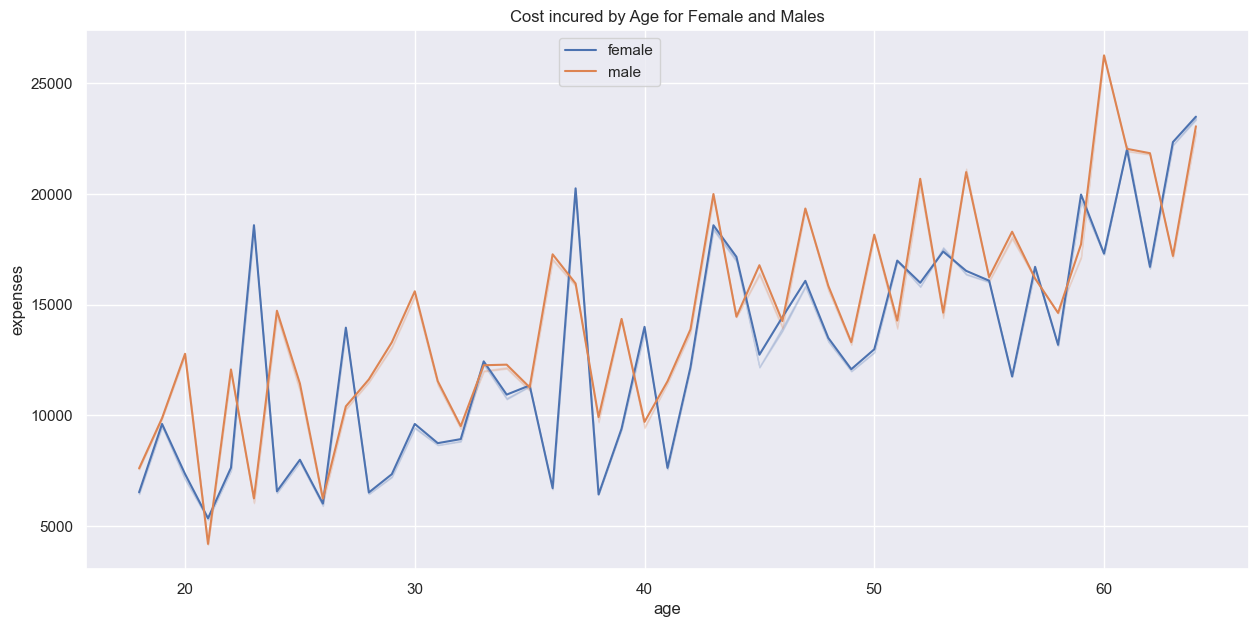

In [45]:
plt.figure(figsize=(15,7))
sns.lineplot(x = df["age"], y =df["expenses"],hue=df["sex"],ci=1).set(title= 'Cost incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

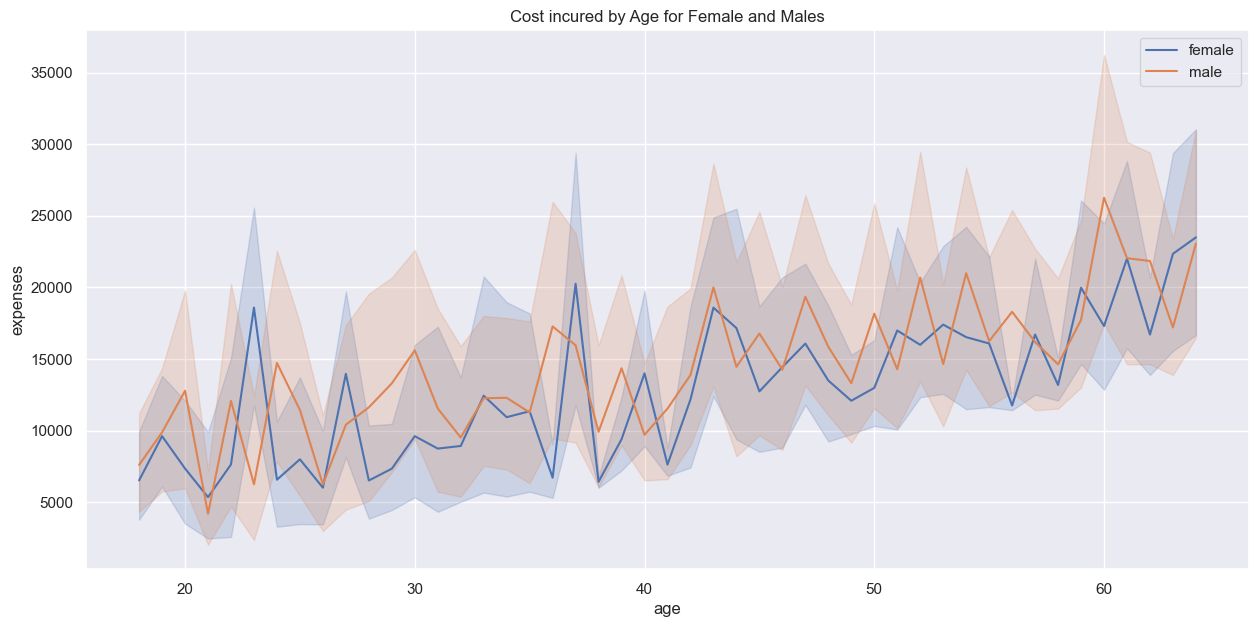

In [46]:
plt.figure(figsize=(15,7))
sns.lineplot(x = df["age"], y =df["expenses"],hue=df["sex"]).set(title= 'Cost incured by Age for Female and Males')
plt.legend()
plt.show()

In [47]:
df_smoker_char_sex1=pd.crosstab(index=df.smoker, columns=df.sex  , values=df.expenses, aggfunc='mean')
df_smoker_char_sex1

sex,female,male
smoker,,
no,8762.297367,8087.204971
yes,30678.996261,33042.006226


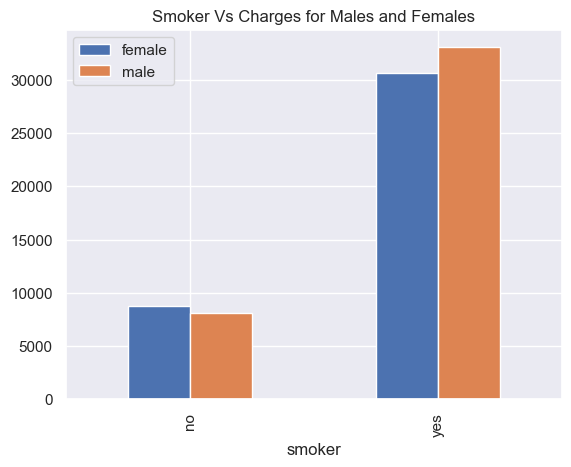

In [48]:
df_smoker_char_sex1.plot(kind='bar',title="Smoker Vs Charges for Males and Females")
plt.legend(loc='upper left')
plt.show()

In [49]:
df_smoker_char_sex=pd.crosstab(index=df.region, columns=  df.sex, values=df.expenses,aggfunc='mean')
df_smoker_char_sex

sex,female,male
region,,
northeast,12953.203106,13854.005767
northwest,12479.870244,12354.119317
southeast,13499.669257,15879.617354
southwest,11274.411667,13412.884233


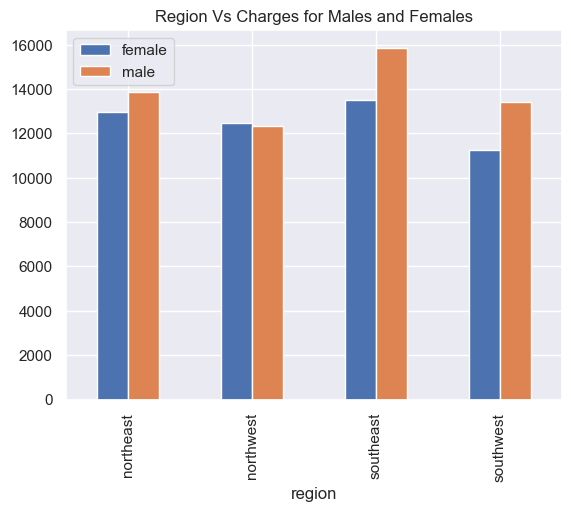

In [50]:
df_smoker_char_sex.plot(kind='bar',title="Region Vs Charges for Males and Females")
plt.legend(loc='upper left')
plt.show()

In [52]:
category = pd.cut(df.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
df.insert(5,'BMIGroup',category)

In [53]:
df.head()

,age,sex,bmi,children,smoker,BMIGroup,region,expenses
0,19,female,27.9,0,yes,25-35,southwest,16884.92
1,18,male,33.8,1,no,25-35,southeast,1725.55
2,28,male,33.0,3,no,25-35,southeast,4449.46
3,33,male,22.7,0,no,15-25,northwest,21984.47
4,32,male,28.9,0,no,25-35,northwest,3866.86


In [54]:
df.groupby(df.BMIGroup).expenses.mean()

BMIGroup
15-25    10284.290121
25-35    12720.254413
35-45    16913.681791
45-55    17547.927500
Name: expenses, dtype: float64

In [61]:
category1=pd.cut(df.age,bins=[16,28,38,48,58,68],labels=['16-28','28-38','38-48','48-58','58-68'])
df.insert(6,'AgeBn',category1)

In [63]:
age_bin_cat = df.groupby(df.AgeBn).expenses.mean()
age_bin_cat

AgeBn
16-28     9096.110000
28-38    11598.555097
38-48    14334.586014
48-58    15887.954489
58-68    20824.973022
Name: expenses, dtype: float64

In [65]:
df.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBn,AgeBi,AgeBin,region,expenses
0,19,female,27.9,0,yes,25-35,16-28,16-28,16-28,southwest,16884.92
1,18,male,33.8,1,no,25-35,16-28,16-28,16-28,southeast,1725.55
2,28,male,33.0,3,no,25-35,16-28,16-28,16-28,southeast,4449.46
3,33,male,22.7,0,no,15-25,28-38,28-38,28-38,northwest,21984.47
4,32,male,28.9,0,no,25-35,28-38,28-38,28-38,northwest,3866.86


In [68]:
df = df.drop('AgeBi', axis=1)

In [69]:
df = df.drop('AgeBin', axis=1)

In [70]:
df.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBn,region,expenses
0,19,female,27.9,0,yes,25-35,16-28,southwest,16884.92
1,18,male,33.8,1,no,25-35,16-28,southeast,1725.55
2,28,male,33.0,3,no,25-35,16-28,southeast,4449.46
3,33,male,22.7,0,no,15-25,28-38,northwest,21984.47
4,32,male,28.9,0,no,25-35,28-38,northwest,3866.86


<Axes: title={'center': 'Agebins vs Avg Expenses'}, xlabel='AgeBn'>

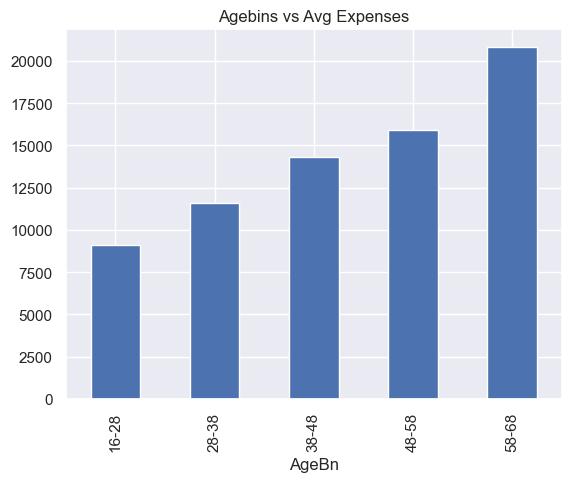

In [71]:
age_bin_cat.plot(kind='bar',title="Agebins vs Avg Expenses")

In [73]:
df.groupby(['region','sex','smoker']).expenses.mean()

region     sex     smoker
northeast  female  no         9640.427121
                   yes       28032.045517
           male    no         8664.042640
                   yes       30926.252895
northwest  female  no         8786.998519
                   yes       29670.824828
           male    no         8320.689167
                   yes       30713.180690
southeast  female  no         8440.205396
                   yes       33034.821389
           male    no         7609.003731
                   yes       36029.839636
southwest  female  no         8234.091702
                   yes       31687.988571
           male    no         7778.906111
                   yes       32598.863784
Name: expenses, dtype: float64

In [75]:
df.groupby(['region','sex','smoker']).expenses.sum()

region     sex     smoker
northeast  female  no        1272536.38
                   yes        812929.32
           male    no        1083005.33
                   yes       1175197.61
northwest  female  no        1186244.80
                   yes        860453.92
           male    no        1098330.97
                   yes        890682.24
southeast  female  no        1173188.55
                   yes       1189253.57
           male    no        1019606.50
                   yes       1981641.18
southwest  female  no        1161006.93
                   yes        665447.76
           male    no         980142.17
                   yes       1206157.96
Name: expenses, dtype: float64

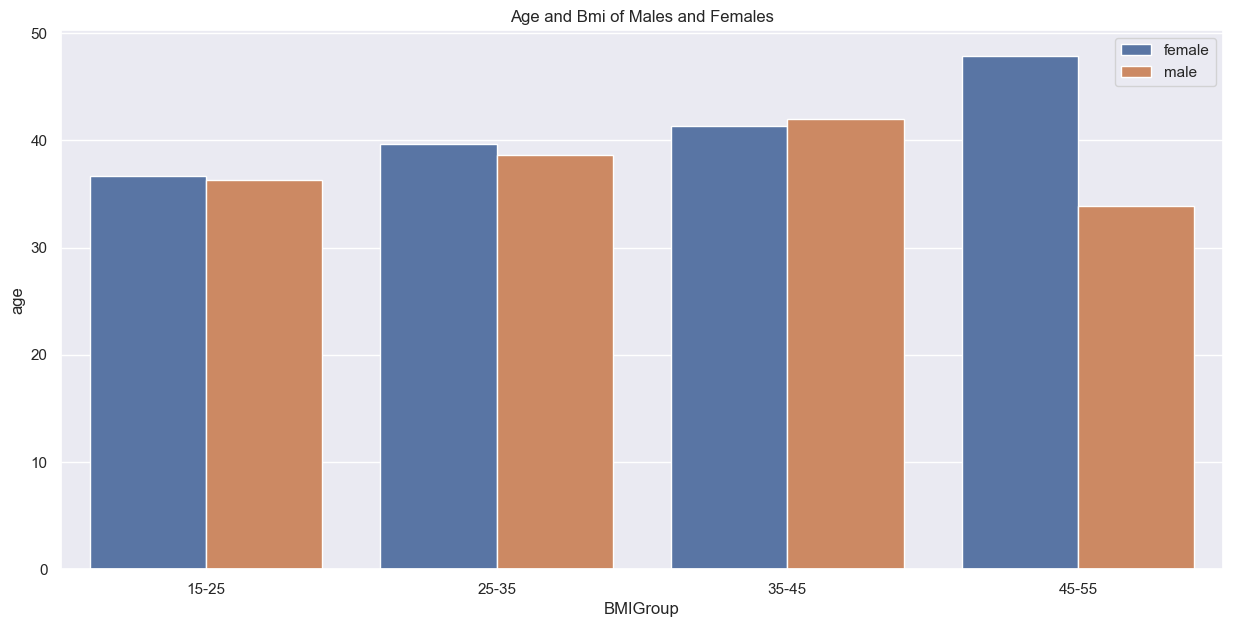

In [76]:
plt.figure(figsize=(15,7))
sns.barplot(x=df["BMIGroup"],y=df["age"],hue=df['sex'],ci=0).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Fig 2:BMI group and Charges ')]

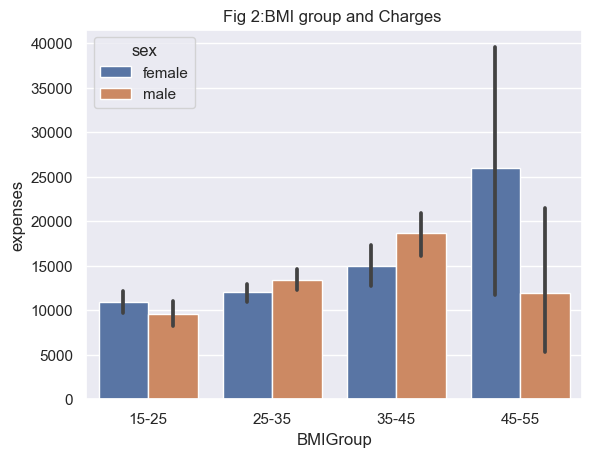

In [77]:
sns.barplot(x='BMIGroup',y='expenses',hue='sex',data=df).set(title="Fig 2:BMI group and Charges " )

In [79]:
pd.crosstab(df['sex'],df['children'])

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


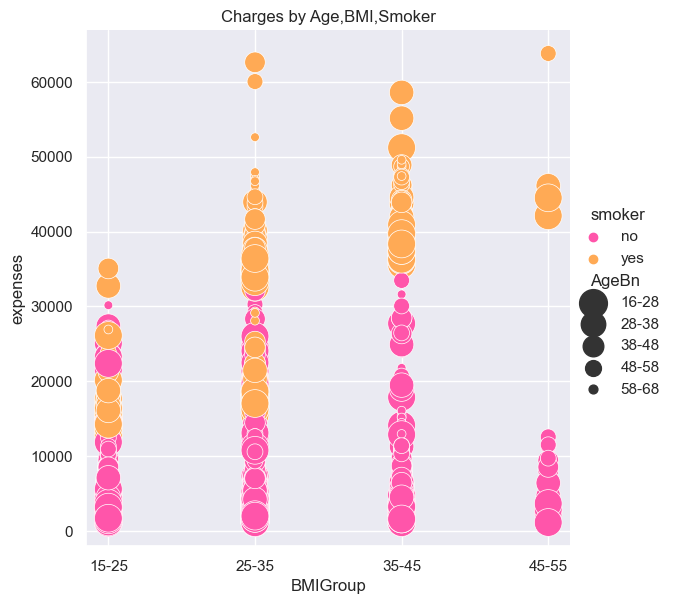

In [81]:
sns.relplot(x=df.BMIGroup, y=df.expenses, hue=df.smoker, size= df.AgeBn,
            sizes=(40, 400), palette="spring",
            height=6, data=df).set(title='Charges by Age,BMI,Smoker');

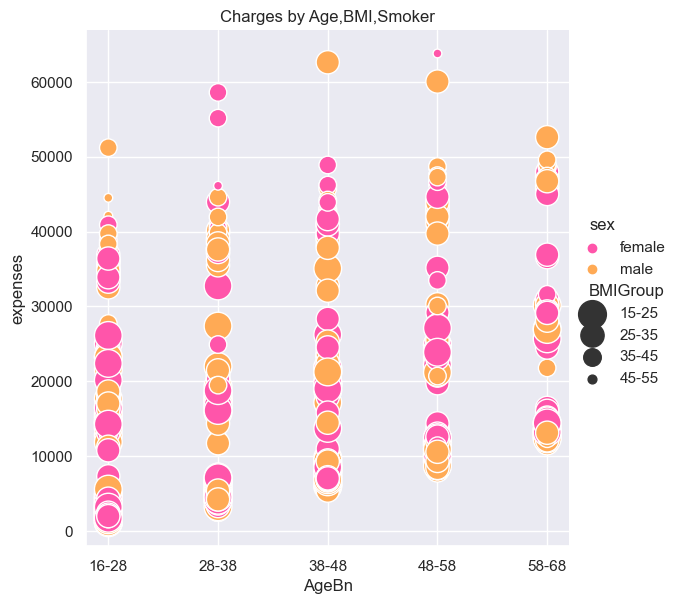

In [83]:
sns.relplot(x=df.AgeBn, y=df.expenses, hue=df.sex, size= df.BMIGroup,
            sizes=(40, 400), palette="spring",
            height=6, data=df).set(title='Charges by Age,BMI,Smoker');

In [84]:
smoker=df.loc[df.smoker=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBn,region,expenses
0,19,female,27.9,0,yes,25-35,16-28,southwest,16884.92
11,62,female,26.3,0,yes,25-35,58-68,southeast,27808.73
14,27,male,42.1,0,yes,35-45,16-28,southeast,39611.76
19,30,male,35.3,0,yes,35-45,28-38,southwest,36837.47
23,34,female,31.9,1,yes,25-35,28-38,northeast,37701.88


In [85]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
BMIGroup    274
AgeBn       274
region      274
expenses    274
dtype: int64

In [86]:
nonsmoker=df.loc[df.smoker=='no']
nonsmoker.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBn,region,expenses
1,18,male,33.8,1,no,25-35,16-28,southeast,1725.55
2,28,male,33.0,3,no,25-35,16-28,southeast,4449.46
3,33,male,22.7,0,no,15-25,28-38,northwest,21984.47
4,32,male,28.9,0,no,25-35,28-38,northwest,3866.86
5,31,female,25.7,0,no,25-35,28-38,southeast,3756.62


In [87]:
nonsmoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
BMIGroup    1064
AgeBn       1064
region      1064
expenses    1064
dtype: int64

In [88]:
nonsmoker = nonsmoker[0:274]
charges_yes = smoker.expenses
charges_no = nonsmoker.expenses

In [89]:
print(f'Average Cost charged to Insurance for smoker is {charges_yes.mean()} and nonsmoker is {charges_no.mean()} ')

Average Cost charged to Insurance for smoker is 32050.23197080292 and nonsmoker is 8460.786167883212 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

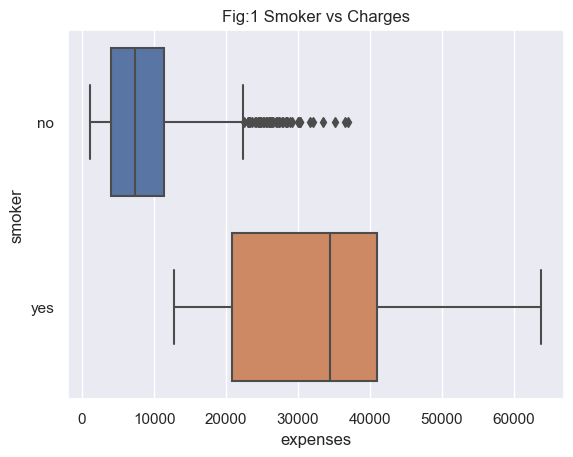

In [90]:
sns.boxplot(x=df.expenses,y=df.smoker,data=df).set(title="Fig:1 Smoker vs Charges")

In [91]:
charges_no

1       1725.55
2       4449.46
3      21984.47
4       3866.86
5       3756.62
         ...   
350    11830.61
351     8932.08
352     3554.20
353    12404.88
354    14133.04
Name: expenses, Length: 274, dtype: float64

In [92]:
alpha = 0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 29.96693762930951 , Pvalue =2.11900162618799e-117 , OnetailPvalue = 1.059500813093995e-117


In [93]:
if p_value_1 < alpha :
    print(f"Conclusion:Since P value {p_value_onetail} is less than alpha {alpha} " )
    # print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    # print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.059500813093995e-117 is less than alpha 0.05 


In [94]:

df_male=df.loc[df.sex=="male"]
df_female=df.loc[df.sex=="female"]


In [95]:
bmi_female=df_female.bmi
bmi_male=df_male.bmi

In [97]:
df_female.bmi.mean()

30.3797583081571

In [99]:
df_male.bmi.mean()

30.94526627218935

In [100]:
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.6970846764986391 , pvalue =  0.08991356987176295


In [101]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")

Conclusion:Since P value 0.08991356987176295 is greater than alpha 0.05 
Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .
